### **Consulta de temperaturas interactivo por ciudad y mes**

#### **Objetivo**

El proyecto consiste en la creación de un programa interactivo para la visualización de datos meteorológicos, el cual permite a los usuarios visualizar los registros climáticos, eligiendo el lugar y el mes. Para ello, se emplean conceptos de creación de **gráficos**, personalización de estilos y habilidades de **programación** con **Python**.

#### **Consigna**

1. Crear un **DataFrame** con los datos meteorológicos.
2. Verificar que las fechas estén en el formato correcto para su manipulación posterior.
3. Crear un programa (una función o un conjunto de funciones) que le pida al usuario que seleccione una ciudad de la lista de ciudades disponibles en el DataFrame y un mes del año.
4. Mostrar al usuario un gráfico que muestre las temperaturas mínimas y máximas que se registraron en la ciudad elegida durante el mes elegido.
5. Preguntar al usuario si desea seguir haciendo consultas o no.


**Importación de librerías**


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

**Lectura de archivo**


In [2]:
df = pd.read_csv("datos_meteorologicos_arg_2023.csv")

**Normalización de columnas y conversión de tipos**


In [3]:
df.columns = df.columns.str.lower().str.replace(" ", "_")  # Cambia a minúsculas y remplaza espacios por "_".
df["fecha"] = pd.to_datetime(df["fecha"], format="%d/%m/%Y")  # Convierte la columna "fecha" a tipo datatime.

**Opciones disponibles para ciudades y meses**


In [4]:
ciudades = sorted(df["ciudad"].unique().tolist())
# fmt: off
meses = {1: "Enero", 2: "Febrero", 3: "Marzo", 4: "Abril", 5: "Mayo", 6: "Junio",
         7: "Julio", 8: "Agosto", 9: "Septiembre", 10: "Octubre", 11: "Noviembre", 12: "Diciembre"}
# fmt: on

**Selección de ciudad**


In [5]:
print("Selecciona una ciudad:")
while True:
    for n, ciudad in enumerate(ciudades, 1):
        print(f"{n}) {ciudad}")
    respuesta = input()
    if respuesta.isdigit() and int(respuesta) in range(1, len(ciudades) + 1):
        ciudad_elegida = ciudades[int(respuesta) - 1]
        break
    else:
        print("Selecciona una opción válida.")

Selecciona una ciudad:
1) Buenos Aires
2) Cordoba
3) Mendoza
4) Rosario
5) Tucuman


**Selección de mes**


In [6]:
print("Selecciona un mes")
while True:
    for n, mes in meses.items():
        print(f"{n}) {mes}")
    respuesta = input()
    if respuesta.isdigit() and int(respuesta) in meses:
        mes_elegido = int(respuesta)
        break
    else:
        print("Selecciona una opción válida.")

Selecciona un mes
1) Enero
2) Febrero
3) Marzo
4) Abril
5) Mayo
6) Junio
7) Julio
8) Agosto
9) Septiembre
10) Octubre
11) Noviembre
12) Diciembre


**Filtra el DF con las respuestas del usuario**


In [7]:
filtro_ciudad = df["ciudad"] == ciudad_elegida
filtro_mes = df["fecha"].dt.month == mes_elegido
df_filtrado = df[(filtro_ciudad) & (filtro_mes)]

**Grafica el resultado**


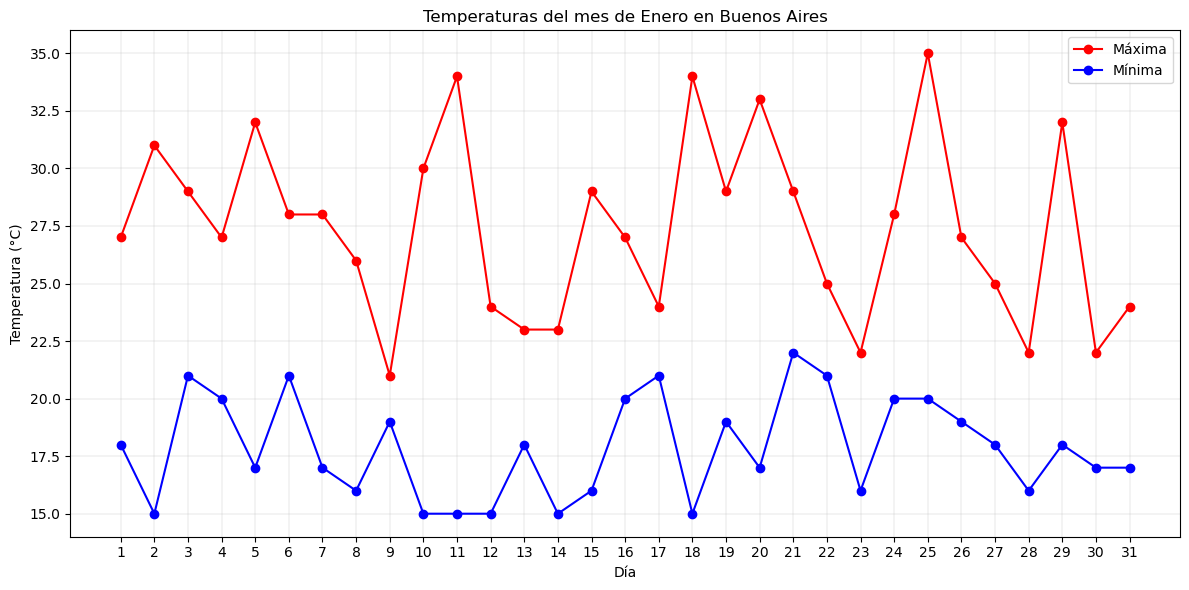

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(df_filtrado["fecha"].dt.day, df_filtrado["temperatura_maxima"], marker="o", label="Máxima", color="red")
plt.plot(df_filtrado["fecha"].dt.day, df_filtrado["temperatura_minima"], marker="o", label="Mínima", color="blue")
plt.title(f"Temperaturas del mes de {meses[mes_elegido]} en {ciudad_elegida}")
plt.xlabel("Día")
plt.ylabel("Temperatura (°C)")
plt.xticks(df_filtrado["fecha"].dt.day)
plt.grid(linewidth=0.2)
plt.legend()
plt.tight_layout()
plt.show()